In [1]:
### do some change in reg_utils.py in predict function 

# import packages
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

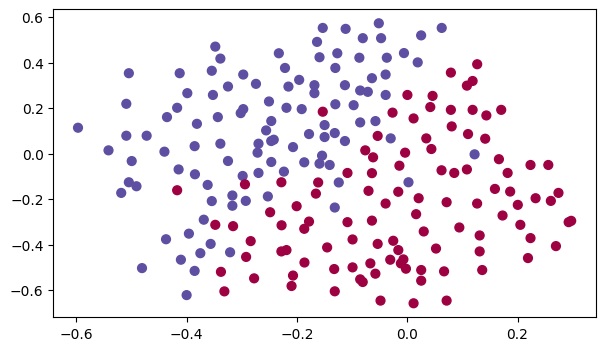

In [2]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

In [5]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 20, 3, 1]
    parameters = initialize_parameters(layers_dims)    

    for i in range(num_iterations):
        A3, cache = forward_propagation(X, parameters)
        gradients = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters , gradients, learning_rate, lambd)
        cost = compute_cost(A3, Y)
        cost = cost + (np.sum(np.square(parameters["W1"])) + np.sum(np.square(parameters["W2"])) + np.sum(np.square(parameters["W3"])))*lambd
        
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    print(cost)
    
    return parameters

Cost after iteration 0: 0.9027827562318174
Cost after iteration 10000: 0.557791203371088
Cost after iteration 20000: 0.5577799771072606


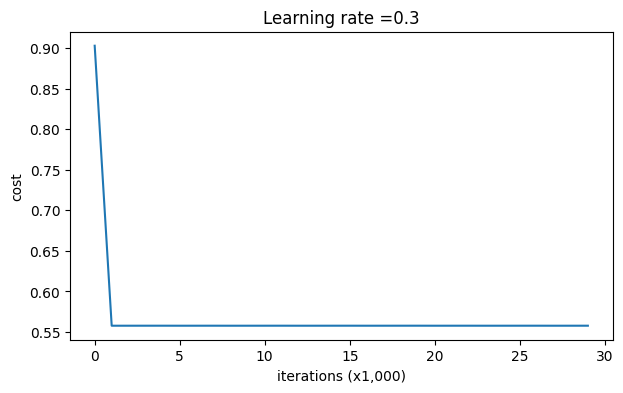

0.5578034112144135
On the training set:
Accuracy: 0.8483412322274881
On the test set:
Accuracy: 0.88


In [9]:
parameters = model(train_X, train_Y, lambd = 0.01)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

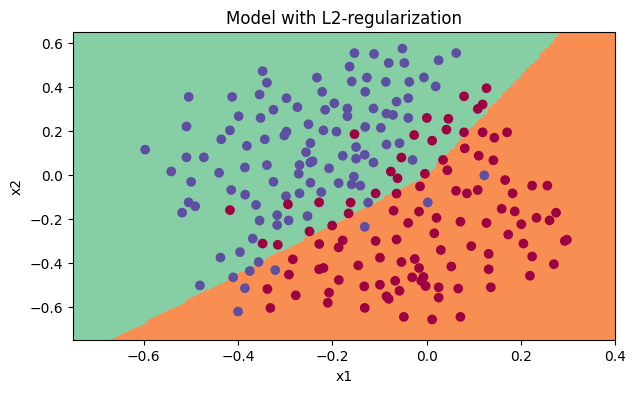

In [10]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)